Open the file

In [ ]:
import pandas as pd
from anytree import Node, RenderTree


db=pd.read_csv('data\\1raw\\animals_info new.csv')
db = db.drop_duplicates()

print(db.isnull().sum())

db.fillna('Unknown', inplace=True)


# Nettoyer les colonnes pour retirer les espaces inutiles
columns_to_clean = ['Kingdom', 'Subphylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
for col in columns_to_clean:
    db[col] = db[col].str.strip()





# Créer un dictionnaire pour stocker les nœuds
nodes = {}

# Construire l'arbre avec des vérifications
for _, row in db.iterrows():
    # Ajouter chaque niveau à l'arbre avec des vérifications pour éviter les doublons
    kingdom = nodes.setdefault(row['Kingdom'], Node(row['Kingdom']))
    subphylum = nodes.setdefault(row['Subphylum'], Node(row['Subphylum'], parent=kingdom))
    _class = nodes.setdefault(row['Class'], Node(row['Class'], parent=subphylum))
    order = nodes.setdefault(row['Order'], Node(row['Order'], parent=_class))
    family = nodes.setdefault(row['Family'], Node(row['Family'], parent=order))
    genus = nodes.setdefault(row['Genus'], Node(row['Genus'], parent=family))
    species = nodes.setdefault(row['Species'], Node(row['Species'], parent=genus))

# Afficher l'arbre
for pre, fill, node in RenderTree(nodes['Animalia']):
    print(f"{pre}{node.name}")


Name            0
Genus           6
Species         0
Kingdom         0
Subphylum       0
Class           0
Order         437
Family          3
Attributes      0
dtype: int64
Animalia
├── Vertebrata
│   ├── Mammalia
│   │   ├── Carnivora
│   │   │   ├── Canidae
│   │   │   │   ├── Canis
│   │   │   │   │   ├── Canis lupus
│   │   │   │   │   ├── Canis latrans
│   │   │   │   │   ├── Canis dingo
│   │   │   │   │   ├── Canis aureus
│   │   │   │   │   ├── Canis simensis
│   │   │   │   │   ├── Canis anthus
│   │   │   │   │   ├── Canis lycaon
│   │   │   │   │   ├── Canis mesomelas
│   │   │   │   │   ├── Canis armbrusteri
│   │   │   │   │   ├── Canis adustus
│   │   │   │   │   ├── Canis lupaster lupaster
│   │   │   │   │   ├── Canis arnensis
│   │   │   │   │   ├── Canis lupaster anthus
│   │   │   │   │   ├── Canis ferox
│   │   │   │   │   ├── Canis lupaster soudanicus
│   │   │   │   │   └── Canis cedazoensis
│   │   │   │   ├── Canis
│   │   │   │   ├── Canis
│   │   │   │   ├──

In [5]:

db=pd.read_csv('data\\1raw\\animals_info new.csv')

# Nombre total d'éléments (cellules)
total_elements = db.size  # ou df.shape[0] * df.shape[1]

# Nombre de lignes
num_rows = db.shape[0]

# Nombre de colonnes
num_columns = db.shape[1]

# Afficher les résultats
print(f"Nombre total d'éléments : {total_elements}")
print(f"Nombre de lignes : {num_rows}")
print(f"Nombre de colonnes : {num_columns}")

# Supprimer les doublons dans le DataFrame
db = db.drop_duplicates()

total_elements = db.size  # ou df.shape[0] * df.shape[1]

# Nombre de lignes
num_rows = db.shape[0]

# Nombre de colonnes
num_columns = db.shape[1]

# Afficher les résultats
print(f"Nombre total d'éléments apres déduplica : {total_elements}")
print(f"Nombre de lignes apres déduplica : {num_rows}")
print(f"Nombre de colonnes apres déduplica : {num_columns}")




Nombre total d'éléments : 264213
Nombre de lignes : 29357
Nombre de colonnes : 9
Nombre total d'éléments apres déduplica : 264213
Nombre de lignes apres déduplica : 29357
Nombre de colonnes apres déduplica : 9


montre les colone

In [8]:
print(db.columns)

Index(['Name', 'Genus', 'Species', 'Kingdom', 'Subphylum', 'Class', 'Order',
       'Family', 'Attributes'],
      dtype='object')


Using matplotlib backend: module://matplotlib_inline.backend_inline
Class
Aves              10114
Mammalia           5879
Reptilia           4273
Gastropoda         3991
Amphibia           3393
Chordata            600
Bivalvia            515
Cephalopoda         336
Animalia            232
Scaphopoda           13
Polyplacophora       10
Solenogastres         1
Name: count, dtype: int64


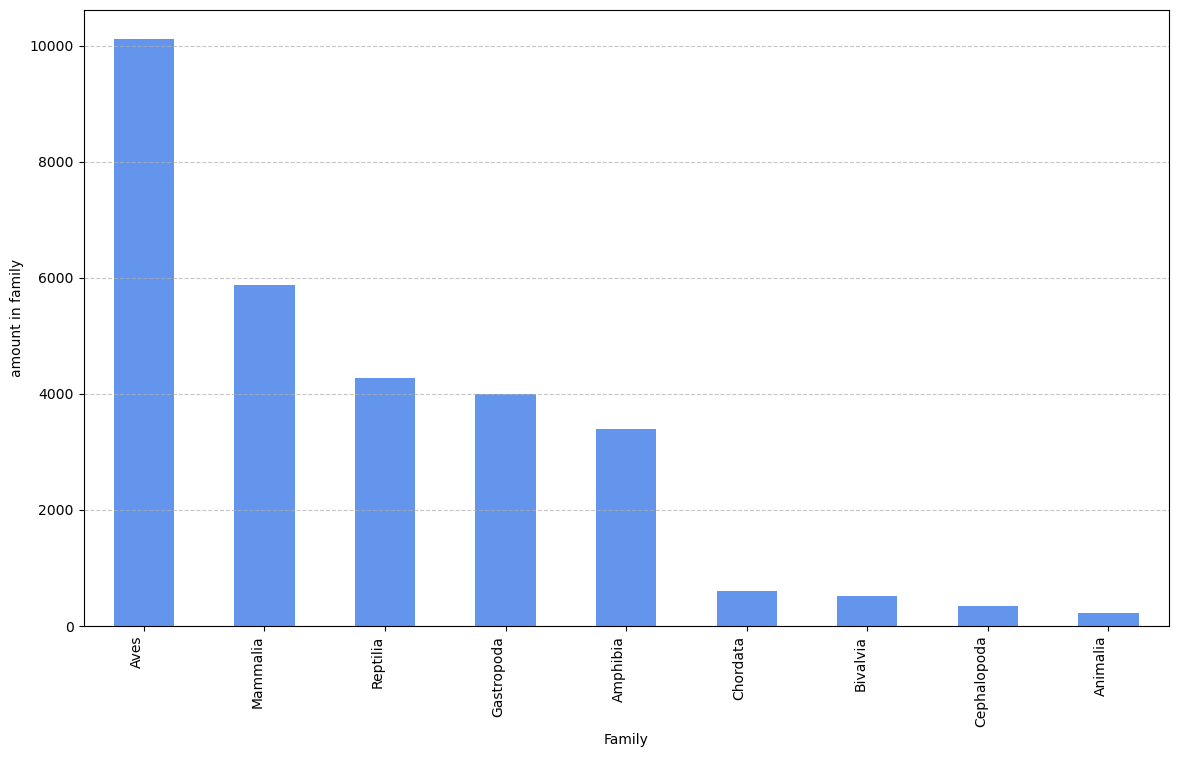

In [17]:
import matplotlib.pyplot as plt
%matplotlib

family = db['Class'].value_counts()
print(family)

plt.figure(figsize=(14, 8))

common_family = family.sort_values().sort_values(ascending=False).head(9)

common_family.plot(kind='bar', color='cornflowerblue')

plt.xlabel('Family')
plt.ylabel('amount in family')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()